# Some basic Regression Techniques

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
data = pd.read_csv("http://data.princeton.edu/wws509/datasets/salary.dat", sep='\s+')
data.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [58]:
data.dtypes

sx    object
rk    object
yr     int64
dg    object
yd     int64
sl     int64
dtype: object

In [61]:
data.loc[data['sx'] == 'male', 'sx']=0
data.loc[data['sx'] == 'female','sx'] = 1

In [62]:
data.loc[data['rk'] == 'assistant', 'rk'] = 1
data.loc[data['rk'] == 'associate','rk'] = 2
data.loc[data['rk'] == 'full','rk'] = 3

In [63]:
data.loc[data['dg'] == 'doctorate','dg'] = 1
data.loc[data['dg'] == 'masters','dg'] = 0

In [64]:
data.shape

(52, 6)

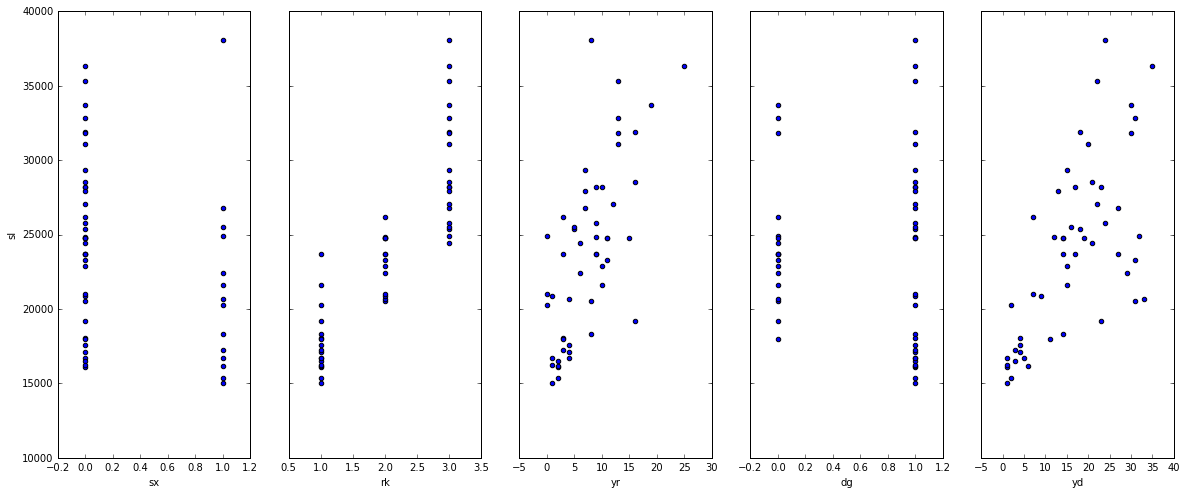

In [66]:
fig, axs = plt.subplots(1, 5, sharey=True)
data.plot(kind='scatter', x='sx', y='sl', ax=axs[0], figsize=(20, 8))
data.plot(kind='scatter', x='rk', y='sl', ax=axs[1])
data.plot.scatter(x='yr', y='sl', ax=axs[2])
data.plot(kind='scatter', x='dg', y='sl', ax=axs[3])
data.plot(kind='scatter', x='yd', y='sl', ax=axs[4])
plt.show()

In [67]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sl ~ sx + rk + yr + dg + yd', data=data).fit()

In [68]:
lm.conf_int()

,0,1
Intercept,14722.370345,19546.951664
sx[T.1],-697.818314,3030.564516
rk[T.2],2985.410752,7599.310791
rk[T.3],8396.154634,13841.373394
dg[T.1],-3440.474849,663.248212
yr,285.143273,667.474758
yd,-280.639691,31.491049


In [69]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     44.24
Date:                Fri, 29 Jan 2016   Prob (F-statistic):           2.87e-17
Time:                        00:59:10   Log-Likelihood:                -474.72
No. Observations:                  52   AIC:                             963.4
Df Residuals:                      45   BIC:                             977.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.713e+04   1197.700     14.306      0.000      1.47e+04  1.95e+04
sx[T.1]     1166.3731    925.569      1.260      0.214      -697.818  3030.565
rk[T.2]     5292.3608   1145.398      4.621      0.000      2985.411  7599.311
rk[T.3]     1.112e+04   1351.772      8.225      0.000      8396.155  1.38e+04
dg[T.1]    -1388.6133   1018.747     -1.363      0.180     -3440.475   663.248
yr           476.3090     94.914      5.018      0.000       285.143   667.475
yd          -124.5743     77.486     -1.608      0.115      -280.640    31.491
==============================================================================
Omnibus:                       26.102   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.617
Skew:                           1.462   Prob(JB):                     1.38e-12
Kurtosis:                       7.082   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

salary = 1.713e+04 + 476.3090 year -124.5743 yd + 0 sex[T.0] + 1166.3731 sex[T.1] + 0 rank[T.1] + 5292.3608 rank[T.2] + 1.112e+04 rank[T.3] + 0 degree[T.0] -1388.6133 degree[T.1]


In [70]:
lm.tvalues

Intercept    14.306310
sx[T.1]       1.260169
rk[T.2]       4.620543
rk[T.3]       8.225323
dg[T.1]      -1.363060
yr            5.018345
yd           -1.607695
dtype: float64

yd, degree and sex are not good indicators as they have low t values

In [72]:
x_new=pd.DataFrame({"sx":[0,1],"rk":[3,3],"yr":[4,13],"dg":[1,1],"yd":[1,22]})

In [73]:
lm.predict(x_new)

array([ 28645.47344017,  31482.56694144])